In [49]:
import pandas as pd

luca = pd.read_csv('/Users/beyzaaygun/Desktop/Bioinformatic/GITHUB/EV/EV/python/luca_expression.csv', index_col=0) 

print(luca)

                 GACGCGTAGCTAAGAT-1-18-8  861140_17-3  \
ENSG00000121410                      0.0          0.0   
ENSG00000268895                      0.0          0.0   
ENSG00000175899                      0.0          0.0   
ENSG00000245105                      0.0          0.0   
ENSG00000166535                      0.0          0.0   
...                                  ...          ...   
ENSG00000070476                      0.0          0.0   
ENSG00000203995                      0.0          0.0   
ENSG00000162378                      0.0          0.0   
ENSG00000159840                      0.0          0.0   
ENSG00000074755                      0.0          0.0   

                 ACGTCAACATCCCATC_LUNG_T08-5  402999_11-3  \
ENSG00000121410                          0.0          0.0   
ENSG00000268895                          0.0          0.0   
ENSG00000175899                          0.0          0.0   
ENSG00000245105                          0.0          0.0   
ENSG000001

In [50]:
transposed_luca = luca.transpose()

print(transposed_luca)

                             ENSG00000121410  ENSG00000268895  \
GACGCGTAGCTAAGAT-1-18-8             0.000000              0.0   
861140_17-3                         0.000000              0.0   
ACGTCAACATCCCATC_LUNG_T08-5         0.000000              0.0   
402999_11-3                         0.000000              0.0   
ATGGTTGTCAATCCGA-1_2-1              0.678011              0.0   
...                                      ...              ...   
598393_7-3                          0.000000              0.0   
ACCTTTACATTGAGCT-1_9-8              0.000000              0.0   
17_AAGGCGTCAGCT-20                  0.000000              0.0   
AGCTTGATCCACTGGG-1_3-6              0.000000              0.0   
410713_5-18                         0.000000              0.0   

                             ENSG00000175899  ENSG00000245105  \
GACGCGTAGCTAAGAT-1-18-8                  0.0              0.0   
861140_17-3                              0.0              0.0   
ACGTCAACATCCCATC_LUNG_T0

In [76]:
import requests

def get_ensemble_gene_id(gene_name):
    url = f"https://rest.ensembl.org/lookup/symbol/homo_sapiens/{gene_name}?content-type=application/json"
    response = requests.get(url)
    if response.ok:
        data = response.json()
        ensemble_gene_id = data['id']
        return ensemble_gene_id
    else:
        print(f"Error: Unable to retrieve Ensemble Gene ID for {gene_name}")
        return None

# Örnek gen isimleri
wanted_genes = ["ARF6", "CD37", "CD63", "CD81", "CD9", "CHMP1A", "CHMP1B", "CHMP2A", "CHMP2B", "CHMP3", "CHMP4A", "CHMP4B", "CHMP4C", "CHMP5", "CHMP6", "HGS", "HSP90AA1", "HSPA4", "HSPA8", "HSPD1", "MVB12A", "MVB12B", "PDCD6", "PDCD6IP", "SDCBP", "SNF8", "STAM", "STAM2", "TSG101", "VPS25", "VPS36", "VPS37A", "VPS37B", "VPS37C", "VPS37D", "VPS4A", "VTA1"]

# Ensemble Gene ID'lerini depolamak için bir liste oluştur
ensemble_gene_ids = []

for gene_name in wanted_genes:
    ensemble_gene_id = get_ensemble_gene_id(gene_name)
    if ensemble_gene_id:
        ensemble_gene_ids.append(ensemble_gene_id)

# Ensemble Gene ID'lerini virgülle ayrılmış ve çift tırnak içinde yazdır
ensemble_gene_ids_str = ', '.join(['"' + gene_id + '"' for gene_id in ensemble_gene_ids])
print(ensemble_gene_ids_str)


"ENSG00000165527", "ENSG00000104894", "ENSG00000135404", "ENSG00000110651", "ENSG00000010278", "ENSG00000131165", "ENSG00000255112", "ENSG00000130724", "ENSG00000083937", "ENSG00000115561", "ENSG00000254505", "ENSG00000101421", "ENSG00000164695", "ENSG00000086065", "ENSG00000176108", "ENSG00000185359", "ENSG00000080824", "ENSG00000170606", "ENSG00000109971", "ENSG00000144381", "ENSG00000141971", "ENSG00000196814", "ENSG00000249915", "ENSG00000170248", "ENSG00000137575", "ENSG00000159210", "ENSG00000136738", "ENSG00000115145", "ENSG00000074319", "ENSG00000131475", "ENSG00000136100", "ENSG00000155975", "ENSG00000139722", "ENSG00000167987", "ENSG00000176428", "ENSG00000132612", "ENSG00000009844"


In [77]:
wanted_genes = ["ENSG00000165527", "ENSG00000104894", "ENSG00000135404", "ENSG00000110651", "ENSG00000010278", "ENSG00000131165", "ENSG00000255112", "ENSG00000130724", "ENSG00000164695", "ENSG00000083937", "ENSG00000115561", "ENSG00000254505", "ENSG00000101421", "ENSG00000086065", "ENSG00000176108", "ENSG00000185359", "ENSG00000080824", "ENSG00000170606", "ENSG00000109971", "ENSG00000144381", "ENSG00000141971", "ENSG00000196814", "ENSG00000249915", "ENSG00000170248", "ENSG00000137575", "ENSG00000159210", "ENSG00000136738", "ENSG00000115145", "ENSG00000074319", "ENSG00000131475", "ENSG00000136100", "ENSG00000155975", "ENSG00000139722", "ENSG00000167987", "ENSG00000176428", "ENSG00000132612", "ENSG00000009844"]


# İstenilen genlerin olduğu sütunları filtrele
filtered_luca = transposed_luca[wanted_genes]

# Sonucu göster
print(filtered_luca)

                             ENSG00000165527  ENSG00000104894  \
GACGCGTAGCTAAGAT-1-18-8             0.650133         0.650133   
861140_17-3                         0.000000         0.609664   
ACGTCAACATCCCATC_LUNG_T08-5         0.635904         1.516206   
402999_11-3                         2.019224         0.000000   
ATGGTTGTCAATCCGA-1_2-1              0.000000         0.395400   
...                                      ...              ...   
598393_7-3                          0.000000         0.000000   
ACCTTTACATTGAGCT-1_9-8              0.000000         0.000000   
17_AAGGCGTCAGCT-20                  0.000000         0.000000   
AGCTTGATCCACTGGG-1_3-6              0.000000         0.000000   
410713_5-18                         0.000000         0.599348   

                             ENSG00000135404  ENSG00000110651  \
GACGCGTAGCTAAGAT-1-18-8             0.000000         0.000000   
861140_17-3                         0.000000         0.000000   
ACGTCAACATCCCATC_LUNG_T0

In [78]:

from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

#  store the row names
row_names = filtered_luca.index.tolist()

# Use the DataFrame containing only gene expressions
gen_expression_only = filtered_luca.values

# Create the PCA model
pca = PCA(n_components=36)  # Let's take a total of 36 components

# Apply the PCA model to the dataset and make it compatible
pca.fit(gen_expression_only)

# Create a DataFrame containing the PCA results
pca_result = pd.DataFrame(pca.transform(gen_expression_only), columns=[f'PC{i+1}' for i in range(36)])

# Add back the row names
pca_result.index = row_names

print(pca_result)


                                  PC1       PC2       PC3       PC4       PC5  \
GACGCGTAGCTAAGAT-1-18-8      1.348172 -0.797529  0.369177 -0.021851  0.295253   
861140_17-3                  2.805774 -0.731482  0.601291 -0.686388 -0.280112   
ACGTCAACATCCCATC_LUNG_T08-5 -0.626342 -1.289843  0.412276  1.009596  0.151184   
402999_11-3                  0.683198 -0.742747  0.210728 -0.368898  0.192598   
ATGGTTGTCAATCCGA-1_2-1      -0.419391  0.949812  0.107070  0.669309  0.770622   
...                               ...       ...       ...       ...       ...   
598393_7-3                  -0.372369 -0.212878  0.419073 -0.591203 -0.207015   
ACCTTTACATTGAGCT-1_9-8       0.817001 -0.566371 -0.678088 -0.301696  0.029853   
17_AAGGCGTCAGCT-20           1.015894  0.375117 -0.799600 -0.564863 -0.079846   
AGCTTGATCCACTGGG-1_3-6      -0.903147 -0.248260  0.690095 -1.659963 -0.092086   
410713_5-18                 -1.773005  0.305408  0.142964  0.197777 -0.575291   

                           

In [79]:
print(pca.singular_values_)

[111.64573931  93.75077941  68.71262273  61.56861689  55.22442245
  52.58522505  49.88685093  46.38945284  45.94624845  42.10095125
  39.66175366  37.50466636  35.0643069   33.86430968  32.2948156
  30.98609523  29.23453265  28.21357301  27.87559581  27.59927458
  27.06504075  26.81277403  25.52787119  22.24786911  20.65677597
  20.26784118  19.21975446  18.72286351  18.17103278  17.71675834
  16.84702896  16.41296861  15.67086705  11.32023048  10.23299363
   9.97632299]


In [55]:
print(pca.explained_variance_ratio_)

[0.20572722 0.14506319 0.07792566 0.06256425 0.05033497 0.04563887
 0.04107519 0.03551779 0.03484236 0.0292544  0.02596278 0.0232155
 0.02029261 0.01892744 0.01721365 0.01584678 0.01410587 0.01313783
 0.01282495 0.01257195 0.01208996 0.01186563 0.01075565 0.00816929
 0.00704259 0.00677989 0.00609682 0.00578565 0.00544963 0.00518055
 0.0046844  0.00444613 0.00405316 0.00211504 0.00172828 0.00164266]


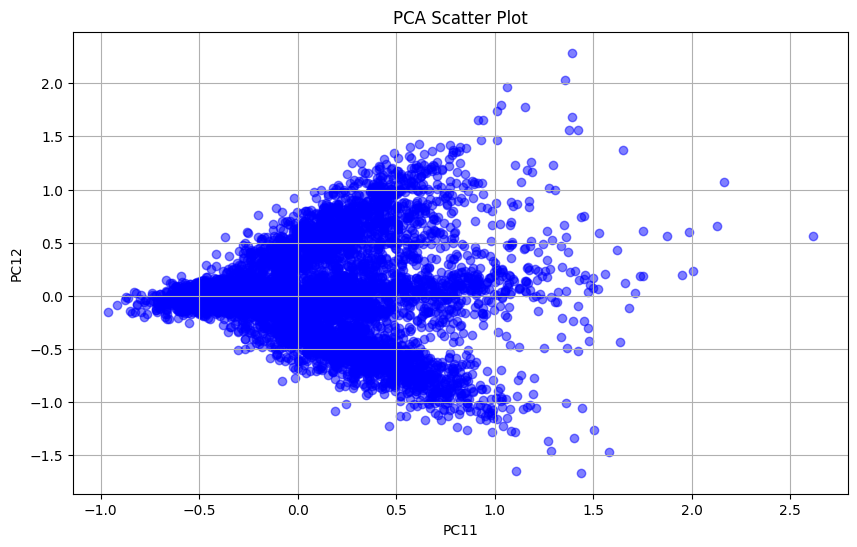

In [80]:
import matplotlib.pyplot as plt

# PCA bileşenlerini seçme
component1 = 'PC11'
component2 = 'PC12'

# PCA sonuçlarından PC1 ve PC2'yi alın
x = pca_result[component1]
y = pca_result[component2]

# Scatter plot oluşturma
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title('PCA Scatter Plot')
plt.xlabel(component1)
plt.ylabel(component2)
plt.grid(True)
plt.show()


In [81]:
#eliminate PC1 and PC2 for prepearing randomforest
pca_result_modified = pca_result.drop(columns=['PC1', 'PC2'])

pca_result_modified = pca_result_modified.iloc[:, :10]

print(pca_result_modified)

                                  PC3       PC4       PC5       PC6       PC7  \
GACGCGTAGCTAAGAT-1-18-8      0.369177 -0.021851  0.295253  0.210971  0.223441   
861140_17-3                  0.601291 -0.686388 -0.280112  0.608638  0.899396   
ACGTCAACATCCCATC_LUNG_T08-5  0.412276  1.009596  0.151184  0.205821 -0.040733   
402999_11-3                  0.210728 -0.368898  0.192598 -0.596583 -0.575710   
ATGGTTGTCAATCCGA-1_2-1       0.107070  0.669309  0.770622 -0.165454 -0.088749   
...                               ...       ...       ...       ...       ...   
598393_7-3                   0.419073 -0.591203 -0.207015 -0.514805 -0.099105   
ACCTTTACATTGAGCT-1_9-8      -0.678088 -0.301696  0.029853 -0.482255 -0.512894   
17_AAGGCGTCAGCT-20          -0.799600 -0.564863 -0.079846  0.484353 -0.534888   
AGCTTGATCCACTGGG-1_3-6       0.690095 -1.659963 -0.092086  1.748879 -1.484814   
410713_5-18                  0.142964  0.197777 -0.575291 -0.491466  0.551587   

                           

In [82]:
#CHANGING EXPRATİON MATRİX WİTH PC
from sklearn.decomposition import PCA
import pandas as pd

# Assume `df` is your original DataFrame from which you performed PCA
gen_expression_only = filtered_luca.values  # excluding the label column

# Create the PCA model
pca = PCA(n_components=36)  # Adjust the number of components as necessary
pca.fit(gen_expression_only)

# Number of components to remove
nComp = 2  # for PC1 and PC2

# Scores: use all rows, but exclude the first 'nComp' columns
scores_remaining = pca.transform(gen_expression_only)[:, nComp:]

# Loadings: use all but the first 'nComp' columns
loadings_remaining = pca.components_[nComp:, :]

# Reconstruct the expression matrix using remaining PCs
expression_reconstructed = np.dot(scores_remaining, loadings_remaining)

# Create a DataFrame for the reconstructed expression matrix
df_reconstructed = pd.DataFrame(expression_reconstructed, index=filtered_luca.index, columns=filtered_luca.columns)  # excluding the label column

print(df_reconstructed)





                             ENSG00000165527  ENSG00000104894  \
GACGCGTAGCTAAGAT-1-18-8             0.252165         0.000223   
861140_17-3                        -0.466540        -0.065616   
ACGTCAACATCCCATC_LUNG_T08-5         0.311030         0.816728   
402999_11-3                         1.656712        -0.620644   
ATGGTTGTCAATCCGA-1_2-1             -0.225014         0.157015   
...                                      ...              ...   
598393_7-3                         -0.284465        -0.481903   
ACCTTTACATTGAGCT-1_9-8             -0.360437        -0.587486   
17_AAGGCGTCAGCT-20                 -0.323972        -0.396659   
AGCTTGATCCACTGGG-1_3-6             -0.260050        -0.475023   
410713_5-18                        -0.189986         0.263037   

                             ENSG00000135404  ENSG00000110651  \
GACGCGTAGCTAAGAT-1-18-8             0.017231        -0.082150   
861140_17-3                         0.182943        -0.076040   
ACGTCAACATCCCATC_LUNG_T0

In [85]:
import pandas as pd

# Gen isimleri ve Ensembl ID'leri
genes = ["ARF6", "CD37", "CD63", "CD81", "CD9", "CHMP1A", "CHMP1B", "CHMP2A", "CHMP2B",
        "CHMP3", "CHMP4A", "CHMP4B", "CHMP4C", "CHMP5", "CHMP6", "HGS", "HSP90AA1", "HSPA4", "HSPA8", "HSPD1",
        "MVB12A", "MVB12B", "PDCD6", "PDCD6IP", "SDCBP", "SNF8", "STAM", "STAM2", "TSG101", "VPS25",
        "VPS36", "VPS37A", "VPS37B", "VPS37C", "VPS37D", "VPS4A", "VTA1"]
ensembl_ids = ["ENSG00000165527", "ENSG00000104894", "ENSG00000135404", "ENSG00000110651", "ENSG00000010278",
            "ENSG00000131165", "ENSG00000255112", "ENSG00000130724", "ENSG00000164695", "ENSG00000083937",
            "ENSG00000115561", "ENSG00000254505", "ENSG00000101421", "ENSG00000086065", "ENSG00000176108",
            "ENSG00000185359", "ENSG00000080824", "ENSG00000170606", "ENSG00000109971", "ENSG00000144381",
            "ENSG00000141971", "ENSG00000196814", "ENSG00000249915", "ENSG00000170248", "ENSG00000137575",
            "ENSG00000159210", "ENSG00000136738", "ENSG00000115145", "ENSG00000074319", "ENSG00000131475",
            "ENSG00000136100", "ENSG00000155975", "ENSG00000139722", "ENSG00000167987", "ENSG00000176428",
            "ENSG00000132612", "ENSG00000009844"]

# DataFrame oluşturma
data = {'Gene': genes, 'Ensembl_ID': ensembl_ids}
df = pd.DataFrame(data)

# Sıralama
df = df.sort_values(by='Gene').reset_index(drop=True)

# DataFrame'i gösterme
print(df)


        Gene       Ensembl_ID
0       ARF6  ENSG00000165527
1       CD37  ENSG00000104894
2       CD63  ENSG00000135404
3       CD81  ENSG00000110651
4        CD9  ENSG00000010278
5     CHMP1A  ENSG00000131165
6     CHMP1B  ENSG00000255112
7     CHMP2A  ENSG00000130724
8     CHMP2B  ENSG00000164695
9      CHMP3  ENSG00000083937
10    CHMP4A  ENSG00000115561
11    CHMP4B  ENSG00000254505
12    CHMP4C  ENSG00000101421
13     CHMP5  ENSG00000086065
14     CHMP6  ENSG00000176108
15       HGS  ENSG00000185359
16  HSP90AA1  ENSG00000080824
17     HSPA4  ENSG00000170606
18     HSPA8  ENSG00000109971
19     HSPD1  ENSG00000144381
20    MVB12A  ENSG00000141971
21    MVB12B  ENSG00000196814
22     PDCD6  ENSG00000249915
23   PDCD6IP  ENSG00000170248
24     SDCBP  ENSG00000137575
25      SNF8  ENSG00000159210
26      STAM  ENSG00000136738
27     STAM2  ENSG00000115145
28    TSG101  ENSG00000074319
29     VPS25  ENSG00000131475
30     VPS36  ENSG00000136100
31    VPS37A  ENSG00000155975
32    VPS3

In [86]:
# Ensembl_ID'leri Gene isimleriyle eşleştiren bir sözlük oluştur
id_to_gene = df.set_index('Ensembl_ID')['Gene'].to_dict()

# df_reconstructed'ın sütun isimlerini güncelle
df_reconstructed.columns = [id_to_gene.get(x, x) for x in df_reconstructed.columns]

# Güncellenmiş DataFrame'i yazdır
print(df_reconstructed.columns)


Index(['ARF6', 'CD37', 'CD63', 'CD81', 'CD9', 'CHMP1A', 'CHMP1B', 'CHMP2A',
       'CHMP2B', 'CHMP3', 'CHMP4A', 'CHMP4B', 'CHMP4C', 'CHMP5', 'CHMP6',
       'HGS', 'HSP90AA1', 'HSPA4', 'HSPA8', 'HSPD1', 'MVB12A', 'MVB12B',
       'PDCD6', 'PDCD6IP', 'SDCBP', 'SNF8', 'STAM', 'STAM2', 'TSG101', 'VPS25',
       'VPS36', 'VPS37A', 'VPS37B', 'VPS37C', 'VPS37D', 'VPS4A', 'VTA1'],
      dtype='object')


In [88]:
#burada kaldım

import pandas as pd
import joblib

# Eğitilmiş modeli yükleme
loaded_model = joblib.load('random_forest_model_new_exp.pkl')

# Yeni veri setinden özellikleri seçme
X_new = df_reconstructed.iloc[:, :]

# Test seti üzerinde %votes değerlerini tahmin etme
votes = loaded_model.predict_proba(X_new)

# Her bir hücre ismi için %votes değerlerini içeren bir DataFrame oluşturma
votes_df = pd.DataFrame(data=votes, columns=loaded_model.classes_, index=X_new.index)

# DataFrame'i görüntüleme veya işlem yapma
print(votes_df)
votes_df.to_csv('votes_df_luca_newexp.csv', index=True)


                             negative  positive
GACGCGTAGCTAAGAT-1-18-8          0.09      0.91
861140_17-3                      0.51      0.49
ACGTCAACATCCCATC_LUNG_T08-5      0.00      1.00
402999_11-3                      0.22      0.78
ATGGTTGTCAATCCGA-1_2-1           0.00      1.00
...                               ...       ...
598393_7-3                       0.00      1.00
ACCTTTACATTGAGCT-1_9-8           0.44      0.56
17_AAGGCGTCAGCT-20               0.25      0.75
AGCTTGATCCACTGGG-1_3-6           0.56      0.44
410713_5-18                      0.46      0.54

[10000 rows x 2 columns]


In [89]:
cell_types = pd.read_csv('/Users/beyzaaygun/Desktop/Bioinformatic/GITHUB/EV/EV/python/primary_luca_cell_type.csv', index_col=0) 

print(cell_types)

                                      ann_fine
GACGCGTAGCTAAGAT-1-18-8      T cell regulatory
861140_17-3                  T cell regulatory
ACGTCAACATCCCATC_LUNG_T08-5             B cell
402999_11-3                         T cell CD4
ATGGTTGTCAATCCGA-1_2-1              Macrophage
...                                        ...
598393_7-3                             NK cell
ACCTTTACATTGAGCT-1_9-8       T cell regulatory
17_AAGGCGTCAGCT-20                Cancer cells
AGCTTGATCCACTGGG-1_3-6            Cancer cells
410713_5-18                        Neutrophils

[10000 rows x 1 columns]


In [90]:
# Yeni bir DataFrame oluşturma ve sıfırlarla doldurma
new_column = pd.DataFrame(index=votes_df.index, columns=["cell_types"])

# Cell_types DataFrame'inin indekslerini kontrol ederek eşleşen satırlara karşılık gelen değerleri atama
for index in cell_types.index:
    if index in votes_df.index:
        new_column.loc[index] = cell_types.loc[index].values[0]

# Yeni sütunu votes_df'e eklemek
votes_df["cell_types"] = new_column

# Oluşturulan DataFrame'i gösterme
print(votes_df)


                             negative  positive         cell_types
GACGCGTAGCTAAGAT-1-18-8          0.09      0.91  T cell regulatory
861140_17-3                      0.51      0.49  T cell regulatory
ACGTCAACATCCCATC_LUNG_T08-5      0.00      1.00             B cell
402999_11-3                      0.22      0.78         T cell CD4
ATGGTTGTCAATCCGA-1_2-1           0.00      1.00         Macrophage
...                               ...       ...                ...
598393_7-3                       0.00      1.00            NK cell
ACCTTTACATTGAGCT-1_9-8           0.44      0.56  T cell regulatory
17_AAGGCGTCAGCT-20               0.25      0.75       Cancer cells
AGCTTGATCCACTGGG-1_3-6           0.56      0.44       Cancer cells
410713_5-18                      0.46      0.54        Neutrophils

[10000 rows x 3 columns]
